In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #Sets the default plot style to 'whitegrid' in seaborn, which adds a white grid background to the plots.
plt.style.use("fivethirtyeight") #Sets the matplotlib plotting style to "fivethirtyeight", which is a specific aesthetic style.
%matplotlib inline 

#It sets up the notebook environment to display matplotlib plots inline (directly in the notebook).

# For reading stock data from yahoo
from pandas_datareader.data import DataReader #Imports the DataReader function from the pandas_datareader.data module, which allows for fetching financial data from various sources.
import yfinance as yf #Imports the yfinance library, which is used to fetch historical market data from Yahoo Finance
from pandas_datareader import data as pdr #Imports the data module from pandas_datareader and gives it the alias pdr.

yf.pdr_override() #Overrides the default methods in pandas_datareader with those from yfinance, allowing for seamless integration and use of yfinance functions.

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['DASH', 'NFLX', 'BABA', 'F']

# Set up End and Start times for data grab
end = datetime.now() #Sets the variable end to the current date and time.
start = datetime(end.year - 1, end.month, end.day) #Sets the variable start to one year before the current date.

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end) #Downloads the stock data for each symbol from start to end using yf.download and stores it in a global variable named after the stock symbol.
    

company_list = [DASH,NFLX,BABA,F] #Creates a list company_list containing the DataFrames for each company's stock data.
company_name = ["DoorDash","Netflix","Alibaba","Ford"] #Creates a list company_name with the names of the companies corresponding to the stock symbols.

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-30,57.549999,58.505001,56.220001,56.560001,56.560001,3650000,DoorDash
2023-01-31,56.790001,58.000000,56.020000,57.919998,57.919998,3099300,DoorDash
2023-02-01,57.450001,59.535000,56.009998,58.910000,58.910000,5430500,DoorDash
2023-02-02,62.000000,65.349998,61.270000,63.810001,63.810001,5720400,DoorDash
2023-02-03,60.180000,62.020000,58.889999,59.040001,59.040001,5835300,DoorDash


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-30 to 2024-01-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1000 non-null   float64
 1   High          1000 non-null   float64
 2   Low           1000 non-null   float64
 3   Close         1000 non-null   float64
 4   Adj Close     1000 non-null   float64
 5   Volume        1000 non-null   int64  
 6   company_name  1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


In [12]:
df['company_name'].unique()

array(['DoorDash', 'Netflix', 'Alibaba', 'Ford'], dtype=object)

In [5]:
F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-30 to 2024-01-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


# company-wise analysis 

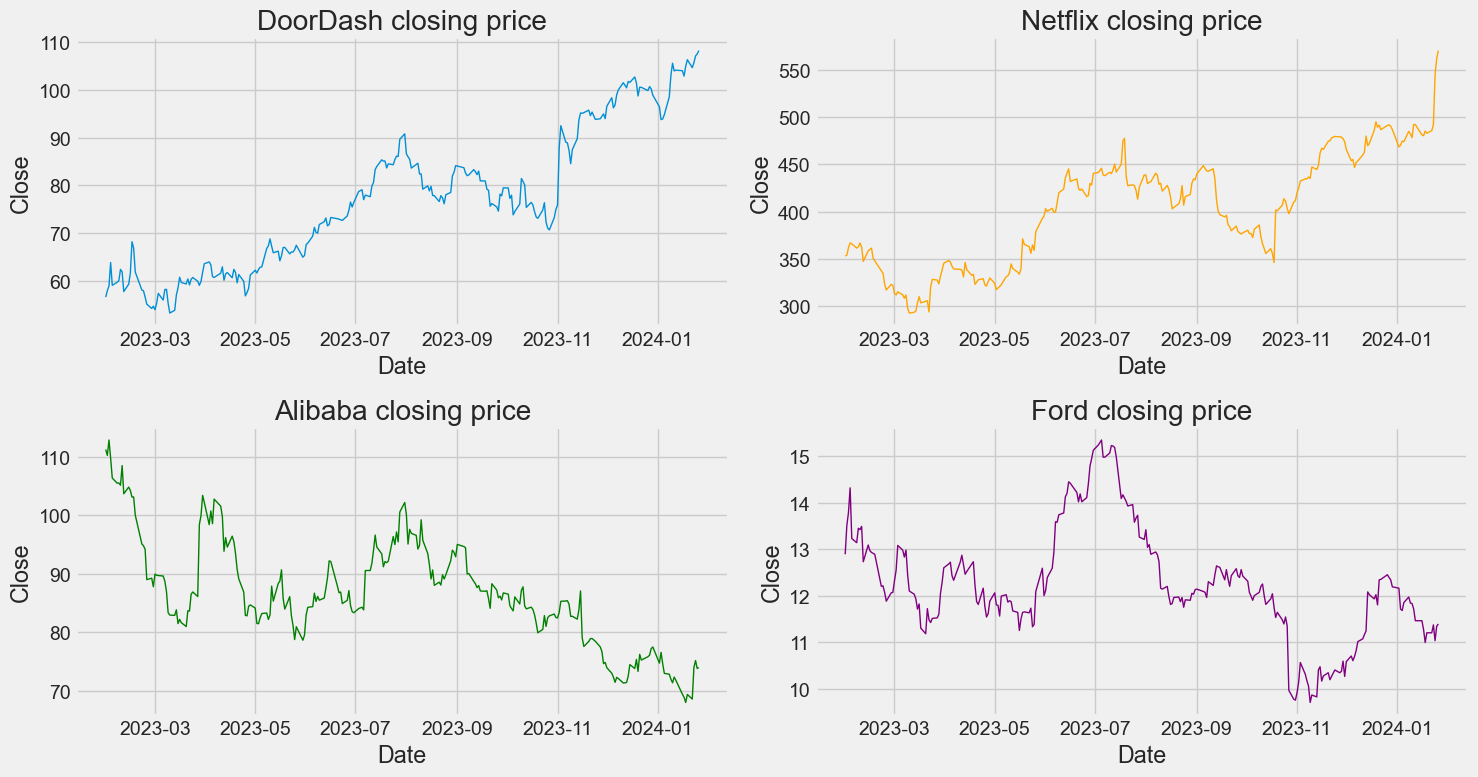

In [14]:
fig = plt.figure(figsize=(15, 8))

# DoorDash
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(DASH['Close'], label='DoorDash', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('DoorDash closing price')

ax1.grid(True)

# Netflix
ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(NFLX['Close'], label='Netflix', linewidth=1, color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Netflix closing price')

ax1.grid(True)

#Alibaba
ax1 = fig.add_subplot(2, 2, 3)
ax1.plot(BABA['Close'], label='Alibaba', linewidth=1, color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Alibaba closing price')

# Ford
ax1 = fig.add_subplot(2, 2, 4)
ax1.plot(F['Close'], label='Ford', linewidth=1, color='purple')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Ford closing price')

ax1.grid(True)
ax1.grid(True)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Use enumerate instead


In [16]:
fruits = ["apple", "banana", "cherry"]

for index, fruit in enumerate(fruits):
    print(index, fruit)


0 apple
1 banana
2 cherry


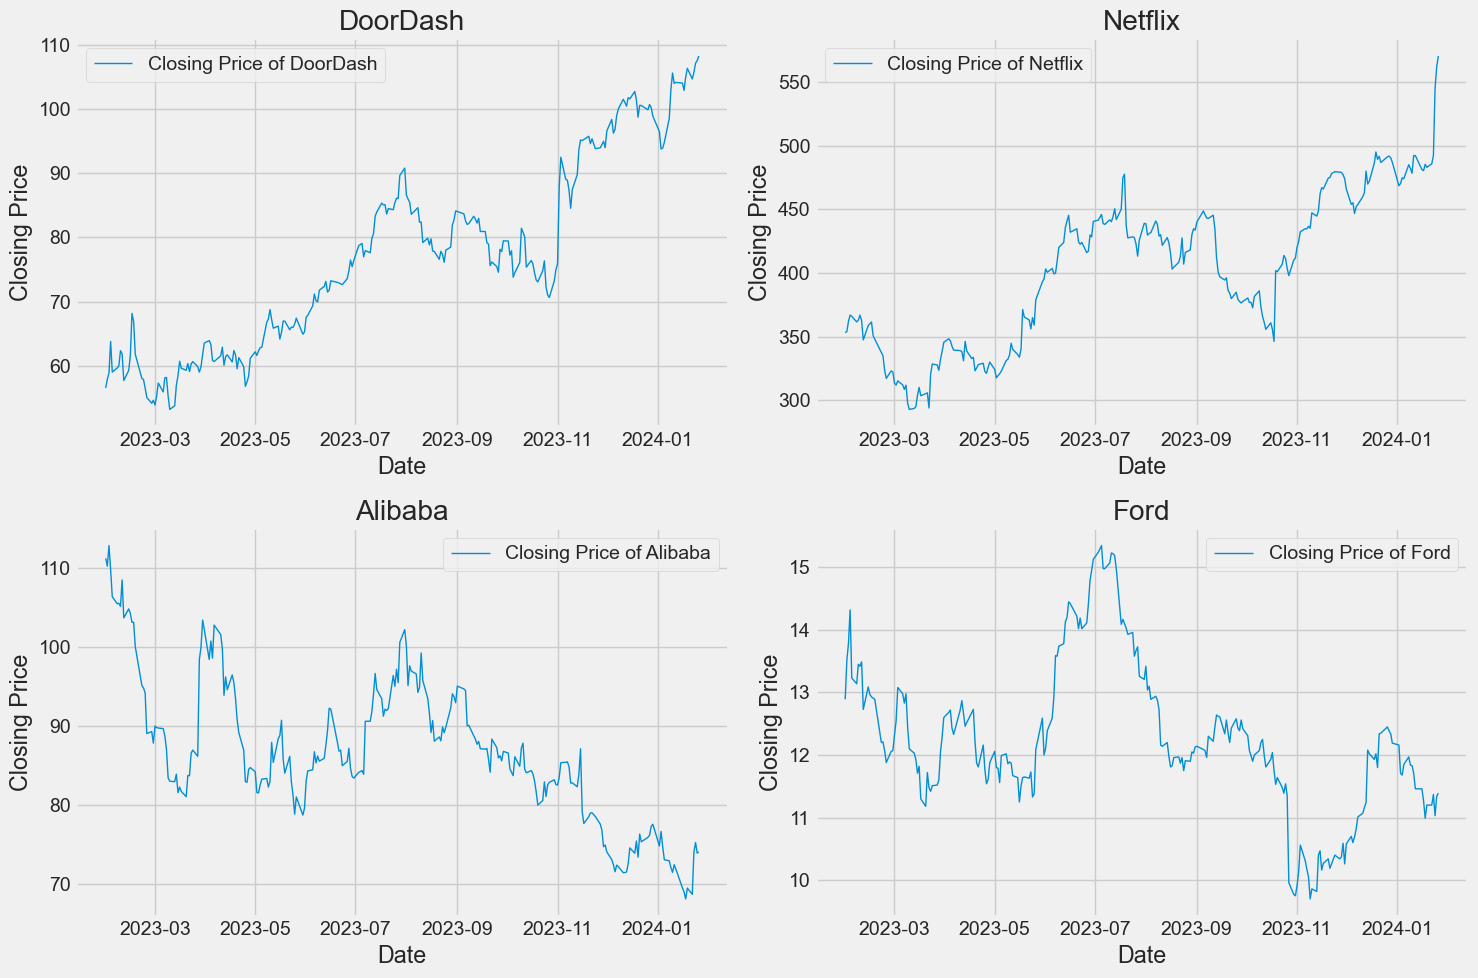

In [18]:
# Define the layout for subplots: 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each unique company and its corresponding axis
for i, company in enumerate(df['company_name'].unique()):
    # Filter the DataFrame for the current company
    company_df = df[df['company_name'] == company]

    # Plot on the ith subplot
    axes[i].plot(company_df['Close'], label=f'Closing Price of {company}',linewidth=1)
    axes[i].set_title(f'{company}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Closing Price')
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
netflix_df=df[df['company_name']=='Netflix']
netflix_df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-30,358.440002,360.950012,352.859985,353.109985,353.109985,5127600,Netflix
2023-01-31,349.980011,355.950012,348.709991,353.859985,353.859985,5660700,Netflix
2023-02-01,353.859985,365.390015,349.910004,361.989990,361.989990,8005200,Netflix
2023-02-02,365.160004,368.320007,358.429993,366.890015,366.890015,7857000,Netflix
2023-02-03,359.079987,379.429993,359.000000,365.899994,365.899994,9402000,Netflix


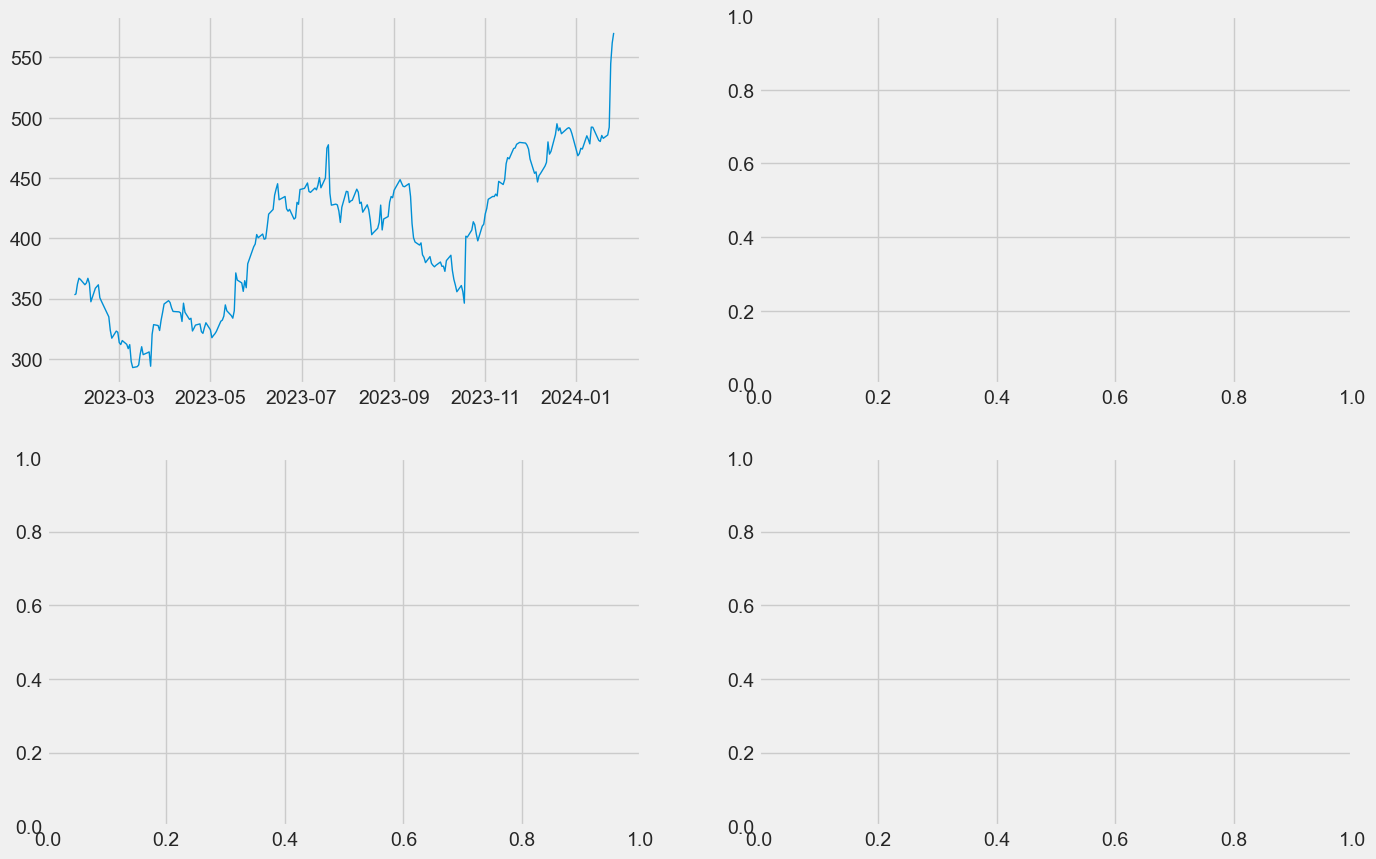

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration
axes[0].plot(netflix_df['Close'], label='Closing Price of Netflix', linewidth=1)
plt.show()
'''This snippet is part of a more streamlined approach where you create all subplots at once using plt.subplots(), 
and then access each subplot using the axes array.
axes[0] refers to the first subplot in the grid.
The plot is directly created on this subplot.
This approach is typically more concise and is preferred when dealing with multiple similar plots.

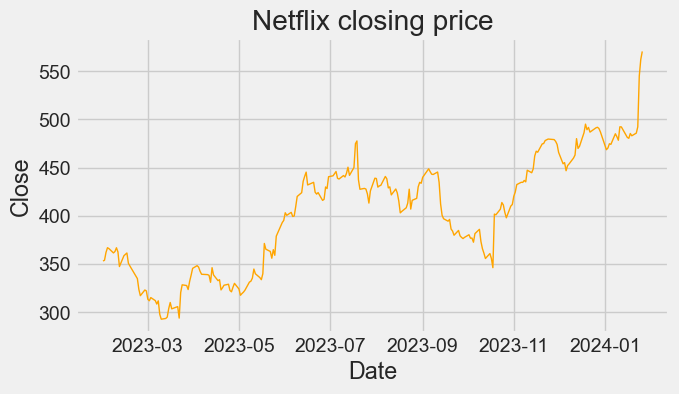

In [31]:
fig = plt.figure(figsize=(15, 8))
# Netflix
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(NFLX['Close'], label='Netflix', linewidth=1, color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Netflix closing price')
ax1.grid(True)
plt.show()

'''This snippet uses a more step-by-step approach, where each subplot is created individually using fig.add_subplot().
This approach offers more control over each individual subplot and is useful when each subplot requires distinct customization.

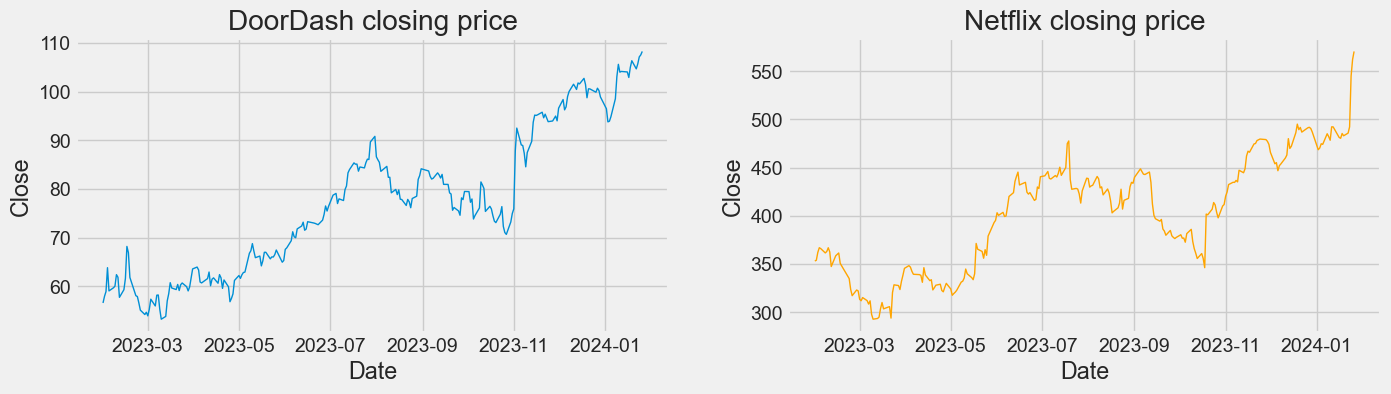

In [32]:
fig = plt.figure(figsize=(15, 8))

# DoorDash
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(DASH['Close'], label='DoorDash', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('DoorDash closing price')

ax1.grid(True)

# Netflix
ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(NFLX['Close'], label='Netflix', linewidth=1, color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Netflix closing price')

ax1.grid(True)


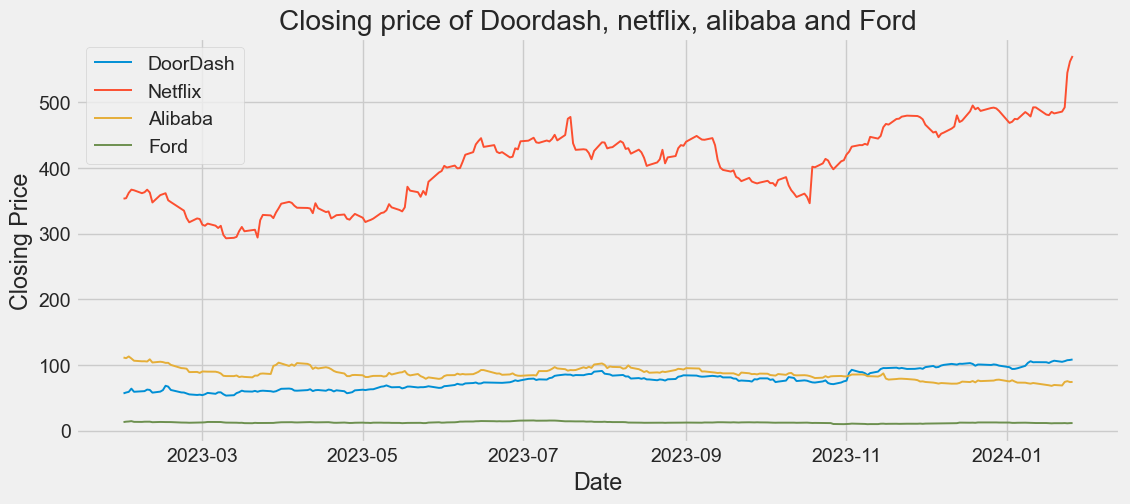

In [49]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(DASH['Close'],label='DoorDash',linewidth=1.4)
ax.plot(NFLX['Close'],label='Netflix',linewidth=1.4)
ax.plot(BABA['Close'],label='Alibaba',linewidth=1.4)
ax.plot(F['Close'],label='Ford',linewidth=1.4)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.title.set_text('Closing price of Doordash, netflix, alibaba and Ford')
ax.legend(loc='upper left')
ax.grid(True)

# Quicker way to plot

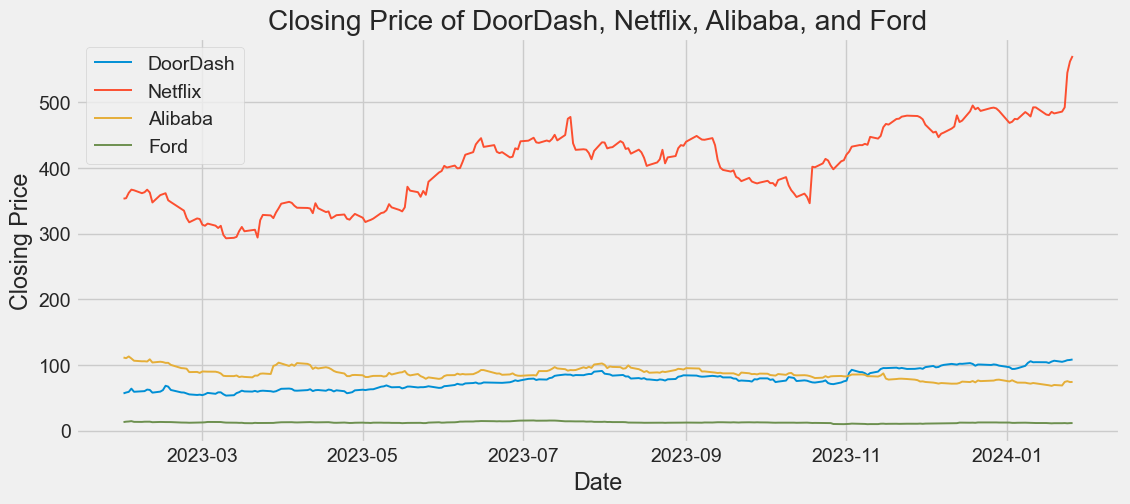

In [47]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Dictionary of DataFrames for easier iteration
stock_data = {'DoorDash': DASH, 'Netflix': NFLX, 'Alibaba': BABA, 'Ford': F}

# Loop through the dictionary to plot each company's data
for company, data in stock_data.items():
    ax.plot(data['Close'], label=company,linewidth=1.4)

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Closing Price of DoorDash, Netflix, Alibaba, and Ford')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()


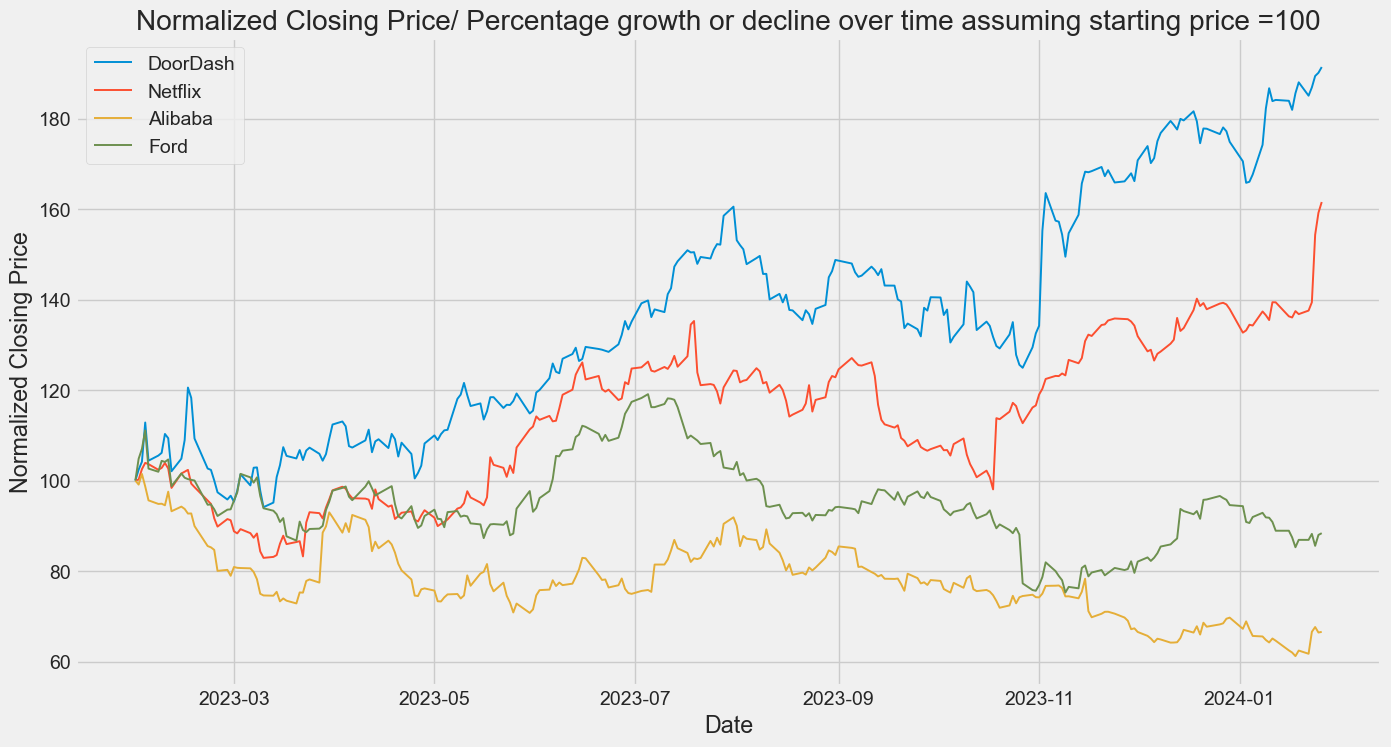

"Normalization: The line (data['Close'] / data['Close'].iloc[0]) * 100 normalizes the closing prices. \nIt divides each closing price by the first closing price in the dataset (data['Close'].iloc[0]) and multiplies by 100. \nThis sets the first data point to 100 for each stock, and subsequent points show the percentage change from the first day.\n\nThis approach is particularly useful for comparing the performance of different stocks, \nespecially when their actual price ranges vary significantly. \nIt highlights the percentage growth or decline over time, rather than focusing on the specific stock prices."

In [57]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# Dictionary of DataFrames for easier iteration
stock_data = {'DoorDash': DASH, 'Netflix': NFLX, 'Alibaba': BABA, 'Ford': F}

# Normalize and plot each company's data
for company, data in stock_data.items():
    normalized_data = (data['Close'] / data['Close'].iloc[0]) * 100
    ax.plot(normalized_data.index, normalized_data, label=company,linewidth=1.4)

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Closing Price')
ax.set_title('Normalized Closing Price/ Percentage growth or decline over time assuming starting price =100')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

'''Normalization: The line (data['Close'] / data['Close'].iloc[0]) * 100 normalizes the closing prices. 
It divides each closing price by the first closing price in the dataset (data['Close'].iloc[0]) and multiplies by 100. 
This sets the first data point to 100 for each stock, and subsequent points show the percentage change from the first day.

This approach is particularly useful for comparing the performance of different stocks, 
especially when their actual price ranges vary significantly. 
It highlights the percentage growth or decline over time, rather than focusing on the specific stock prices.'''

# 2. Time Series Analysis:
Stock Price Trends: Plot time series graphs to visualize the stock price trends over time for each company.
Moving Averages: Calculate and plot moving averages to understand the trend and momentum of stock prices.

In [59]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-30,57.549999,58.505001,56.220001,56.560001,56.560001,3650000,DoorDash
2023-01-31,56.790001,58.000000,56.020000,57.919998,57.919998,3099300,DoorDash
2023-02-01,57.450001,59.535000,56.009998,58.910000,58.910000,5430500,DoorDash
2023-02-02,62.000000,65.349998,61.270000,63.810001,63.810001,5720400,DoorDash
2023-02-03,60.180000,62.020000,58.889999,59.040001,59.040001,5835300,DoorDash


C:\Users\Duyen\AppData\Local\Temp\ipykernel_10152\3340260150.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  DASH = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
C:\Users\Duyen\AppData\Local\Temp\ipykernel_10152\3340260150.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  NFLX = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
C:\Users\Duyen\AppData\Local\Temp\ipykernel_10152\3340260150.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  BABA = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
C:\Users\Duyen\AppData\Local\Temp\ipykernel_10152\3340260150.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

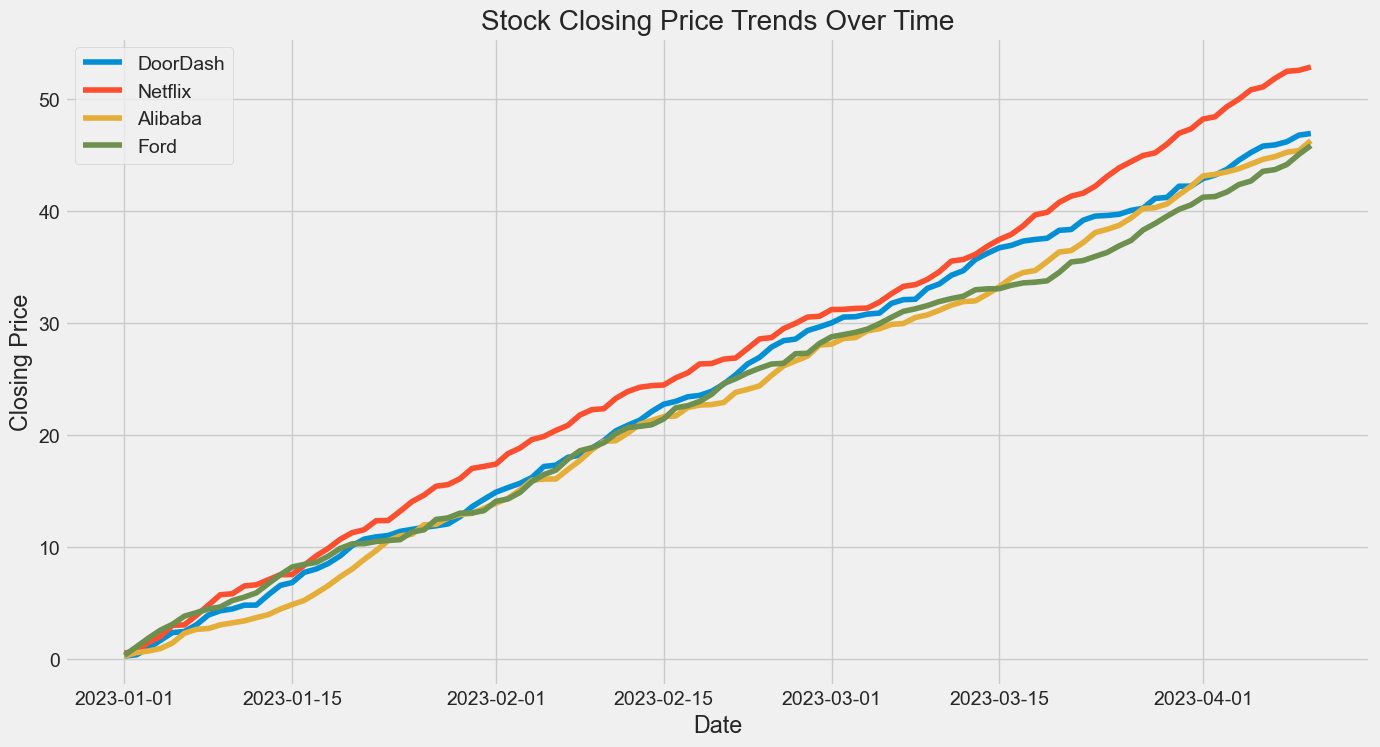

In [2]:
# Sample DataFrames with 'Date' as the index (replace with your actual data)
DASH = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
                    index=pd.date_range(start='2023-01-01', periods=100, freq='D'))
NFLX = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
                    index=pd.date_range(start='2023-01-01', periods=100, freq='D'))
BABA = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
                    index=pd.date_range(start='2023-01-01', periods=100, freq='D'))
F = pd.DataFrame({'Close': pd.np.random.rand(100).cumsum()},
                  index=pd.date_range(start='2023-01-01', periods=100, freq='D'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each company's closing prices
ax.plot(DASH.index, DASH['Close'], label='DoorDash')
ax.plot(NFLX.index, NFLX['Close'], label='Netflix')
ax.plot(BABA.index, BABA['Close'], label='Alibaba')
ax.plot(F.index, F['Close'], label='Ford')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock Closing Price Trends Over Time')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


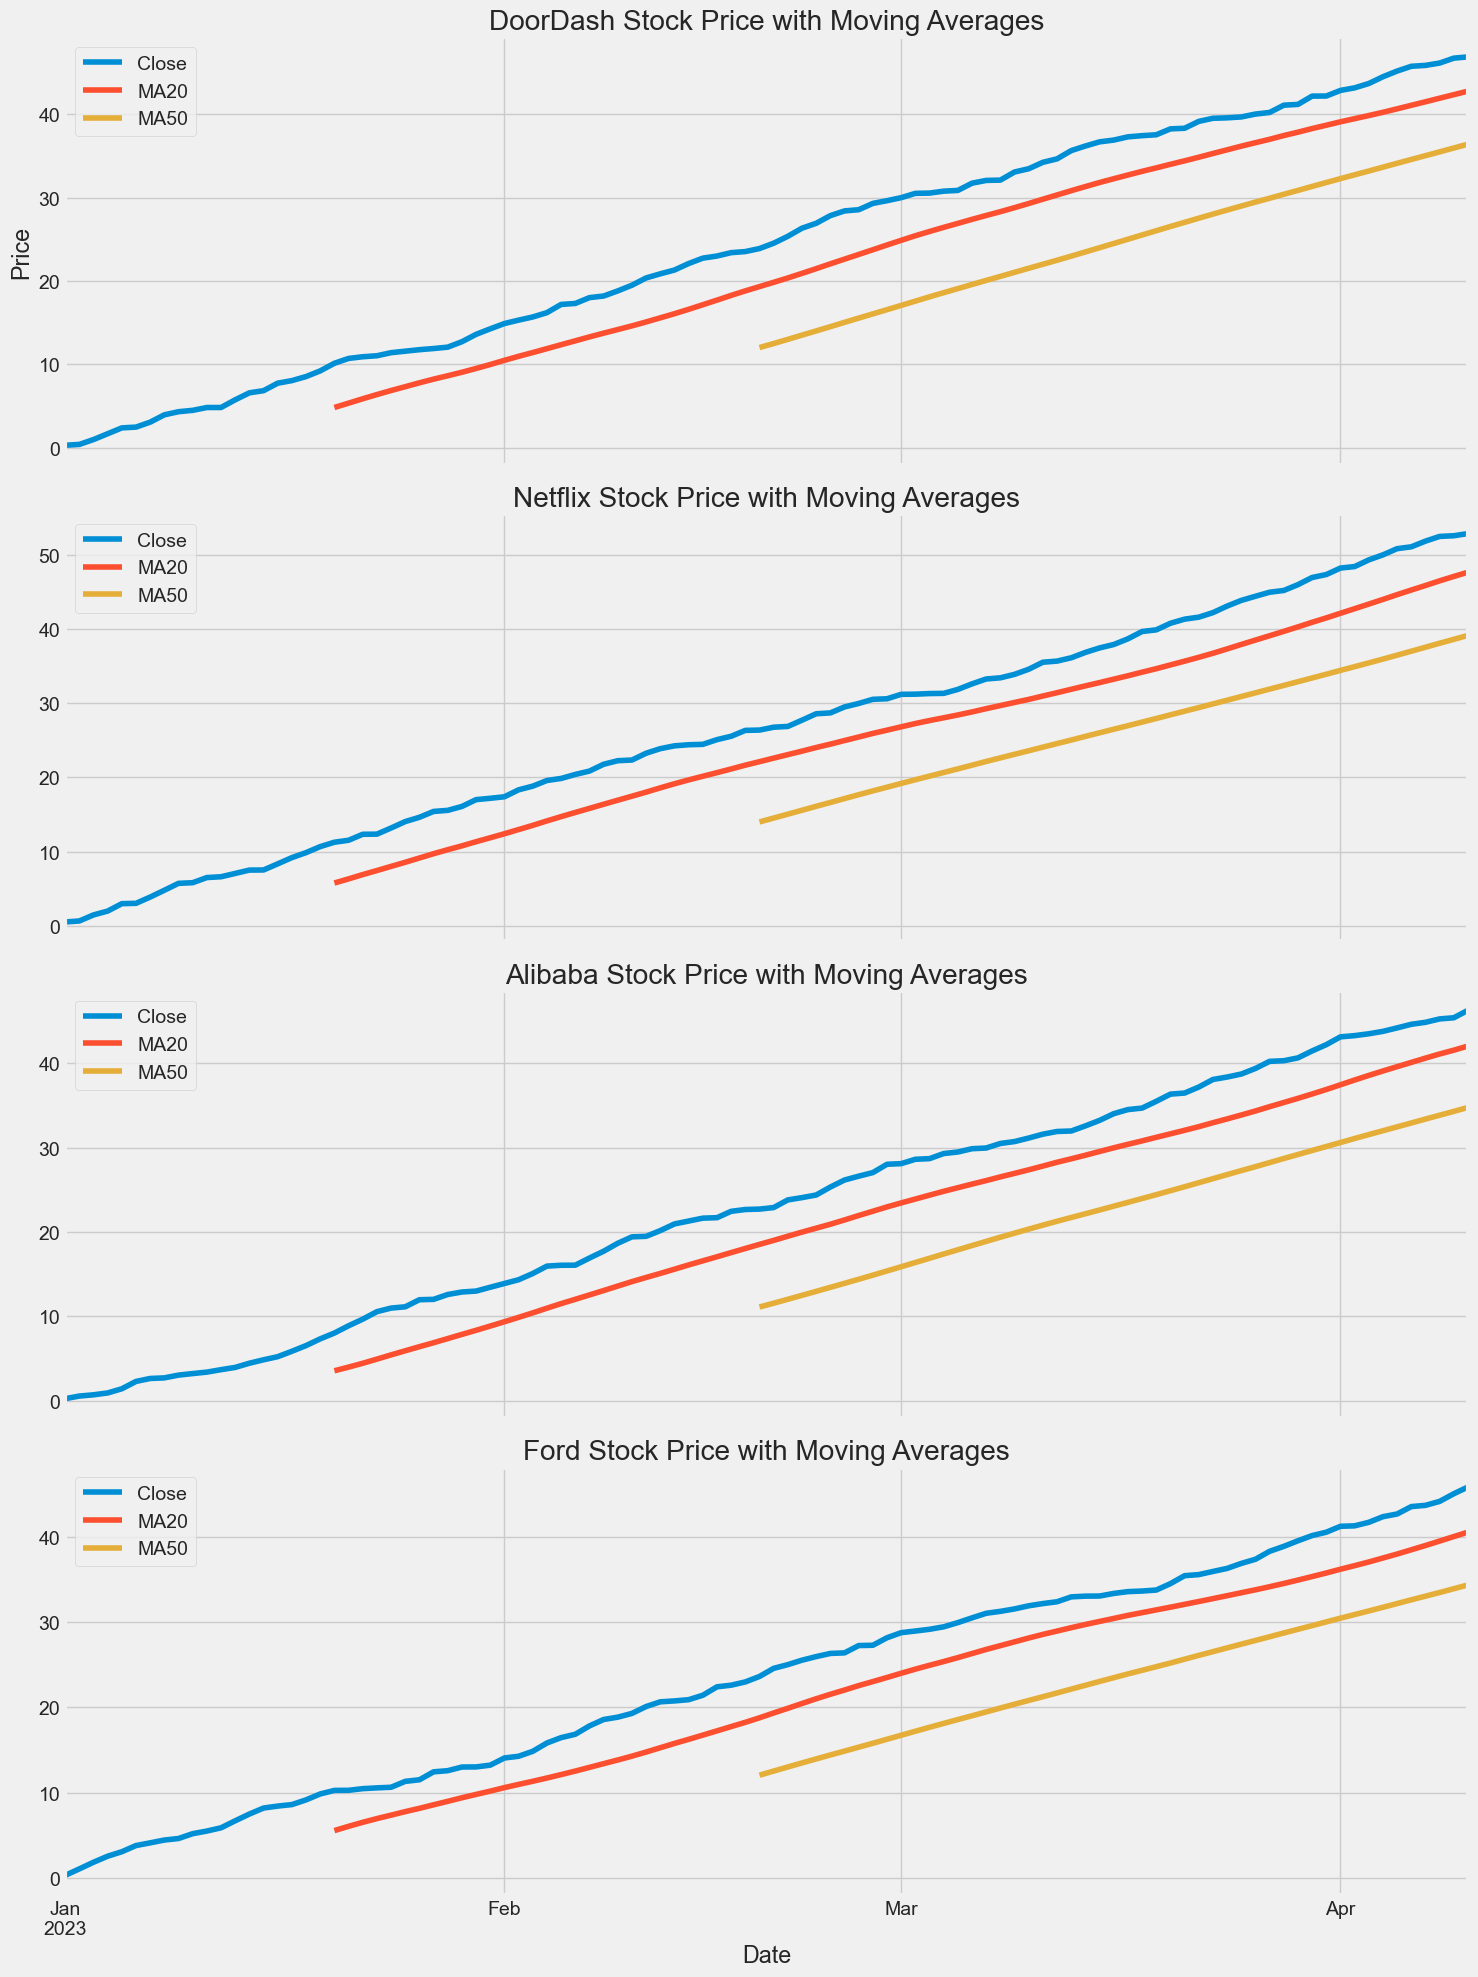

In [4]:
# Define moving averages
moving_averages = [20, 50]

# Function to add moving averages to the DataFrame
def add_moving_averages(df, moving_averages):
    for ma in moving_averages:
        df[f'MA{ma}'] = df['Close'].rolling(window=ma).mean()

# Add moving averages to each stock DataFrame
add_moving_averages(DASH, moving_averages)
add_moving_averages(NFLX, moving_averages)
add_moving_averages(BABA, moving_averages)
add_moving_averages(F, moving_averages)

# Create a figure and axis for moving averages
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot moving averages for each company
for ax, stock, name in zip(axs, [DASH, NFLX, BABA, F], ['DoorDash', 'Netflix', 'Alibaba', 'Ford']):
    stock['Close'].plot(ax=ax, label='Close')
    for ma in moving_averages:
        stock[f'MA{ma}'].plot(ax=ax, label=f'MA{ma}')
    ax.set_title(f'{name} Stock Price with Moving Averages')
    ax.legend()
    ax.grid(True)

# Customize the plot
axs[-1].set_xlabel('Date')
axs[0].set_ylabel('Price')
plt.tight_layout()

# Show the plot
plt.show()


# 3. Comparative Analysis:
Stock Performance Comparison: Compare the stock performance of these companies over the same time period.
Volume Analysis: Analyze the trading volume to understand investor interest and market activity.


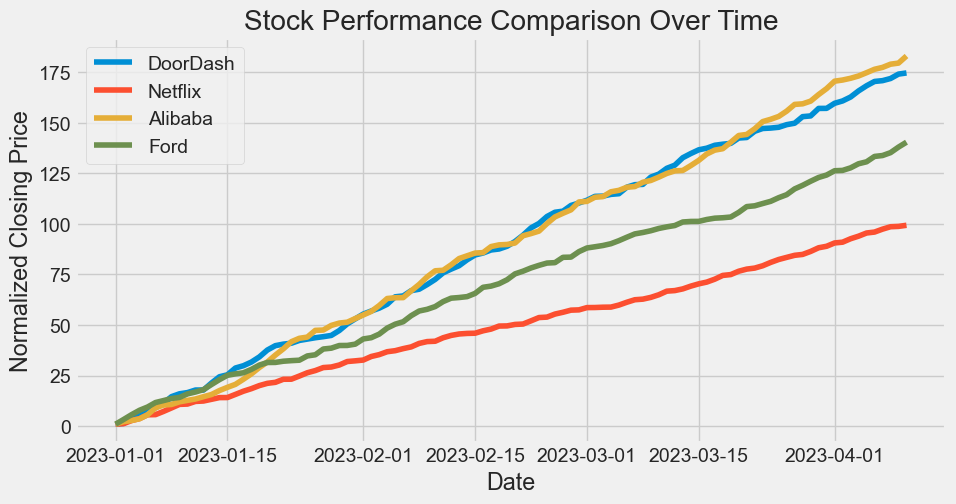

In [9]:
# Normalize the closing prices (to compare the performance)
DASH['Norm_Close'] = DASH['Close'] / DASH['Close'].iloc[0]
NFLX['Norm_Close'] = NFLX['Close'] / NFLX['Close'].iloc[0]
BABA['Norm_Close'] = BABA['Close'] / BABA['Close'].iloc[0]
F['Norm_Close'] = F['Close'] / F['Close'].iloc[0]

# Create a figure and axis for normalized closing prices
fig, ax = plt.subplots(figsize=(10, 5))

# Plot normalized closing prices for comparison
ax.plot(DASH.index, DASH['Norm_Close'], label='DoorDash')
ax.plot(NFLX.index, NFLX['Norm_Close'], label='Netflix')
ax.plot(BABA.index, BABA['Norm_Close'], label='Alibaba')
ax.plot(F.index, F['Norm_Close'], label='Ford')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Closing Price')
ax.set_title('Stock Performance Comparison Over Time')
ax.legend()
ax.grid(True)

# 4. Correlation Analysis:
Price Correlation: Check if there's any correlation in the price movements of these stocks.
Heatmap: Use a heatmap to visualize the correlation matrix.


In [14]:
F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-01-01 to 2023-04-10
Freq: D
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       100 non-null    float64
 1   MA20        81 non-null     float64
 2   MA50        51 non-null     float64
 3   Norm_Close  100 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


# 5. Advanced Analysis (if applicable):
Volatility Analysis: Calculate and compare the volatility of these stocks.
Event Study: Analyze stock price reactions to major events or news related to these companies.